# Previous Lesson

binary classification, small data

# Next Lesson

훨씬 더 많은 양의 데이터를 이용해서 학습이 이미 된 trained model 을 사용하고, feature 들도 그 model 이 사용한 것을 사용하게 되면 어떻게 될까? 

-> Transfer Learning's Concept




convolution, maxpooling 을 통해서 이미 많은 데이터를 이용해서 특징을 추출되어있는 것을 사용하게 되는 것이다. 

이후에 model.layer.Sequential 안에 넣는 것이다. 즉, convolution, pooling 까지만 이미 되어있는 것을 사용한다고 이해하면 되는것일까? 

이제부터 우리는 INCEPTION 이라는 것을 사용하게 될 것이다. well-trained state of the art model 이라고 한다. 

#### pretrained weight 를 우리는 사용하게 되는 것이다. 

inceptionv3 라는 것 안에는 이미 훈련이 완료가 된 weight 와 같은 parameter 가 존재 한다. 그래서 우리는 이것을 그대로 쏙 ! 빼서 우리만의 모델을 다시 만들고, 이미 weight 가 훈련 되어있는 상태에서 예측을 진행하는 것이다. 

# last layer = mixed7 이라고 설정을 한 뒤에 

그 Layer 를 이용해서 train 하고 뭔가를 하려고 한다고 한다. 


근데 왜 하필 이 layer 를 갖고 하는 것인지 이해가 되지 않는다... 

그리고 이것으로 무엇을 결론적으로 하고 있는 것인지도 이해가 되지 않는다... 내가 잘 못들은 것인가? 



# drop out 

drop out 에 대해서 이제 공부를 하게 될 것이다. 
drop out 이라는 것은, 
- dropout remove a random number of neurons in your neural network. 

그리고 2 가지 이유로 인해서 잘 작동한다. 
- neighboring neurons often end up with similar weights, which can lead to overfitting, so dropping some out a t random can remove this. 

- often a neuron can over-weigh the input from a neuron in the previous layer, and can over specialize as a result. Thus dropping out can break the neural network out of this potential bad habit! 

- 가까이에 있는 뉴런들은 weight 가 비슷하다는 성향을 갖고 있다. 이로 인해서 overfitting 이 일어나는 것이고. 그래서 dropout 을 하게 되면 이렇게 비슷한 weight 를 들고 있는 것들을 없애 줄 수 있게 되고 overfitting 을 방지할 수 있게 해 주는 것이다. 

- 종종 뉴런은 prvious layer 에 있는 neuron 의 input 을 over-weigh 하는 경우가 있다고 한다. 

# drop out

cats-dogs 에서 inception, aumentation 을 둘다 사용했음에도 불구하고 overfitting 이 일어났다. 

그래서 이제 drop out 을 통해서 overfitting 을 잡아 보려고 한다. 

keras 안에 drop out 이라는 layer 가 존재 한다. neuron 들에게 비슷한 weight 가 있는 경우 overfitting 이 일어 날수 있기 때문에 neuron 을 삭제 함으로써  서로에게 주는 impact 를 없애려는 것이다. 

#### CODE

dropout 은 % ( fraction) 으로 진행이 된다. 그래서 

x = layer.Dropout(0.2)(x) 

으로 설정을 하게 되면, 20% 를 없앨 것이라고 하는 것이다. 
(참고로, dropout 은 layer 별로 설정을 따로 할수도 있는 것이다. 0~1 사이에서) 



# Code 에 붙힐것! 

- 처음에는 weight 를 다운 받을 것이다
- 우리는 convolutional layer 중 하나를 input layer 로 뽑아 낼 것이고 여기의 output 을 사용하게 될 것이다. 얘를 'last_output' 이라고 명명하자. 
- 그리고나서 our model 이 'last_output' 을 input 으로 받게 만들 것이고 flatten, desnse, dropout, output layer 가 존재 하게 만들 것이다. 
- 그리고 나서 cats-and-dogs 데이터를 다운 받을 것이고 unzip 하게 만들 것이다. 
- image augmentation 사용을 하고, 이후에 image 들이 정상적으로 load 되고, segragate 되었는지 확인을 하게 될 것이다. 
- 결과적으로는 training_acc = 90, validation_acc = 97 이 되게 되었다. 
- 결국, overfitting 을 잘잡았다는 것을 알게 되었다는 것을 알게 된다. 
- 지금은 binary_classification 만 생각을 하고 있지만, 추후에는 multi_class 도 고려를 하게 될 것이다. 

In [25]:
import os 
from tensorflow.keras import layers
from tensorflow.keras import Model 

!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
    
from tensorflow.keras.applications.inception_v3 import InceptionV3

local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

pre_trained_model = InceptionV3(input_shape = (150,150,3),
                               include_top = False,
                                weights = None)

pre_trained_model.load_weights(local_weights_file)

for layer in pre_trained_model.layers:
    layer.trainable = False
    
pre_trained_model.summary()

last_layer = pre_trained_model.get_layer ('mixed7')
print("last_layer.output_shape : ", last_layer.output_shape)

--2021-07-23 13:20:30--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 34.64.4.112, 34.64.4.80, 34.64.4.16, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|34.64.4.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: `/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

/tmp/inception_v3_w 100%[===================>]  83.84M  6.73MB/s    in 25s     

2021-07-23 13:20:55 (3.41 MB/s) - `/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5' saved [87910968/87910968]

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 150, 150, 3) 0                               

In [8]:
from tensorflow.keras.optimizers import RMSprop

# flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# add a fully connected layer with 1024 hidden units and ReLU activation
x = layers.Dense(1024, activation = 'relu')(x)
# add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)
# add a final sigmoid layer for clasification
x = layers.Dense(1, activation = 'sigmoid')(x)

model = Model(pre_trained_model.input,x)

model.compile(optimizer = RMSprop (lr = 0.0001),
              loss = 'binary_crossentropy',
              metrics = ['accuracy']
             )

In [19]:
!wget --no-check-certificate \
        https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
       -O /tmp/cats_and_dogs_filtered.zip
    
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os 
import zipfile

local_zip = '//tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp')
zip_ref.close()

# define our example directories and files
base_dir = '/tmp/cats_and_dogs_filtered'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

train_cat_fnames = os.listdir(train_cats_dir)
train_dog_fnames = os.listdir(train_dogs_dir)

# add our data augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,
                                  rotation_range = 40,
                                  width_shift_range = 0.2,
                                  height_shift_range = 0.2,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True)

#note that the validation data should not be augmented! 
test_datagen = ImageDataGenerator(rescale = 1./255)
print("here?")
#flow training images in batches of 20 using train_datagen
train_generator = train_datagen.flow_from_directory(train_dir, 
                                                   batch_size = 20,
                                                   class_mode = 'binary',
                                                   target_size = (150,150))
print("here?")
validation_generator = test_datagen.flow_from_directory(validation_dir, 
                                                       batch_size = 20,
                                                       class_mode = 'binary',
                                                       target_size = (150,150))
print("here?")

--2021-07-21 19:05:39--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.175.112, 172.217.31.176, 172.217.161.48, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.175.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: `/tmp/cats_and_dogs_filtered.zip'

/tmp/cats_and_dogs_ 100%[===================>]  65.43M  39.8MB/s    in 1.6s    

2021-07-21 19:05:41 (39.8 MB/s) - `/tmp/cats_and_dogs_filtered.zip' saved [68606236/68606236]

here?
Found 2000 images belonging to 2 classes.
here?
Found 1000 images belonging to 2 classes.
here?


In [20]:
history = model.fit(train_generator, 
                    validation_data = validation_generator, 
                    steps_per_epoch = 100,
                    epochs = 20, 
                    validation_steps = 50,
                    verbose = 2)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 100 steps, validate for 50 steps
Epoch 1/20
100/100 - 65s - loss: 0.3801 - accuracy: 0.8305 - val_loss: 0.2706 - val_accuracy: 0.9430
Epoch 2/20
100/100 - 65s - loss: 0.3238 - accuracy: 0.8625 - val_loss: 0.3578 - val_accuracy: 0.9350
Epoch 3/20
100/100 - 66s - loss: 0.3176 - accuracy: 0.8680 - val_loss: 0.3738 - val_accuracy: 0.9390
Epoch 4/20
100/100 - 66s - loss: 0.2962 - accuracy: 0.8715 - val_loss: 0.3778 - val_accuracy: 0.9390
Epoch 5/20
100/100 - 69s - loss: 0.3013 - accuracy: 0.8695 - val_loss: 0.2700 - val_accuracy: 0.9610
Epoch 6/20
100/100 - 67s - loss: 0.2861 - accuracy: 0.8790 - val_loss: 0.4900 - val_accuracy: 0.9330
Epoch 7/20
100/100 - 68s - loss: 0.2841 - accuracy: 0.8845 - val_loss: 0.2897 - val_accuracy: 0.9640
Epoch 8/20
100/100 - 64s - loss: 0.2839 - accuracy: 0.8940 - val_loss: 0.3895 - val_accuracy: 0.9490
Epoch 9/20
100/100 - 64s - loss: 0.2628 - accuracy: 0.8990 - val_loss: 0.3217 - val_accuracy: 0.957

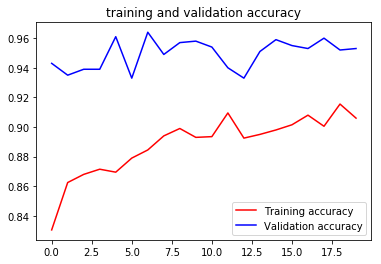

<Figure size 432x288 with 0 Axes>

In [23]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation accuracy')
plt.title('training and validation accuracy')
plt.legend(loc = 0)
plt.figure()

plt.show()